---

# 🧮 Estimación de Puntuaciones de Examen con Regresión Lineal

## 📘 Informe de Investigación 3
**Materia:** Inteligencia de Negocios
**Tema:** Estimación usando Regresión Lineal

**Autores:**
- Randy Alexander Germosén Ureña *(1013-4707)*
- Fernando Almonte Delgado *(1015-7628)*

---

## 🎯 Objetivo del Proyecto
El propósito de este trabajo es aplicar la **Regresión Lineal** como técnica de estimación para predecir la **puntuación en un examen** de un estudiante en función de dos variables predictoras:
- Horas de estudio
- Horas de sueño

A través de este modelo, se busca analizar cómo estos factores influyen en el desempeño académico y evaluar la precisión del modelo predictivo mediante métricas de desempeño.

---

## 📂 Dataset Utilizado
**Archivo:** `student_exam_regression.csv`

---

## 🧠 Metodología
**El proceso metodológico se desarrolló en las siguientes etapas:**

1. **Obtención de los datos:** se utilizó el archivo ```student_exam_regression.csv```, que contiene los registros de horas de estudio, horas de sueño y la calificación final de los estudiantes.

2. **Preparación de los datos:** se verificó la estructura del conjunto de datos, se identificaron valores faltantes y se realizaron resúmenes estadísticos para explorar la distribución de las variables.

3. **División del conjunto de datos:** el dataset fue dividido en subconjuntos de entrenamiento y prueba, con el fin de ajustar y validar el modelo de regresión.

4. **Construcción del modelo:** se aplicó la función lm() de R para estimar el modelo de regresión lineal múltiple con la fórmula:
$$\text{Calificación} = -0.87189 + 6.55909(\text{horas de estudio}) + 3.24630(\text{horas de sueño})$$

5. **Evaluación del modelo:** se analizaron los coeficientes estimados, su significancia estadística (valores p), y el coeficiente de determinación ajustado $R^2$ ajustado para valorar el ajuste global del modelo. También se calcularon métricas de error como el RMSE y MAE para evaluar su precisión.

6. **Visualización de resultados:** se elaboraron gráficos de dispersión y de comparación entre valores observados y predichos, con el fin de verificar el comportamiento del modelo y la coherencia de las predicciones.

---

## 📊 Resultados
El modelo de regresión lineal múltiple demuestra que las horas de estudio y de sueño influyen significativamente en el rendimiento académico, explicando cerca del 80 % de la variabilidad en las calificaciones. Cada hora adicional de estudio aumenta en promedio 6.56 puntos la nota, y cada hora extra de sueño, 3.25 puntos. Estos resultados indican que tanto el esfuerzo académico como el descanso adecuado contribuyen de manera positiva al desempeño de los estudiantes.

---

## 🧩 Herramientas Utilizadas
- **R** (en un entorno de Notebook de Jupyter o RStudio)
- **Librerías principales (R):**
  - `readr` y `dplyr` (parte de `tidyverse`) – Manejo y análisis de datos
  - `ggplot2` (parte de `tidyverse`) – Visualización de datos
  - `GGally` – Matriz de gráficos de correlación (EDA)
  - `caTools` – División de datos (train/test split)

# 1. Configuración e Importación de Librerías

**Descripción:** Se prepara el entorno de R cargando los paquetes necesarios. ```tidyverse``` para la importación y  manipulación de datos. ```caTools``` para dividir el dataset de forma aleatoria en conjuntos de entrenamiento y prueba.

In [2]:
install.packages("tidyverse")
install.packages("GGally")
install.packages("caTools")

library(ggplot2)
library(tidyverse)
library(GGally)
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




# 2. Carga y Exploración Inicial de Datos

Descripción: Se lee el archivo CSV y su estructura (```str```) y un resumen estadístico (```summary```). También se comprueba si hay valores nulos.

In [3]:
data <- read_csv("student_exam_regression.csv", show_col_types = FALSE)
spec(data)
str(data)
summary(data)
colSums(is.na(data))

cols(
  Hours_Study = col_double(),
  Hours_Sleep = col_double(),
  Exam_Score = col_double()
)

spc_tbl_ [400 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Hours_Study: num [1:400] 6.96 2.86 2.27 5.51 7.19 ...
 $ Hours_Sleep: num [1:400] 6.28 5.4 8.66 5.57 8.55 ...
 $ Exam_Score : num [1:400] 75.8 14.8 43.4 61.7 89.4 ...
 - attr(*, "spec")=
  .. cols(
  ..   Hours_Study = col_double(),
  ..   Hours_Sleep = col_double(),
  ..   Exam_Score = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


  Hours_Study       Hours_Sleep      Exam_Score      
 Min.   :0.02688   Min.   :4.000   Min.   :  0.9154  
 1st Qu.:2.69359   1st Qu.:5.325   1st Qu.: 36.8855  
 Median :4.92438   Median :6.574   Median : 53.0790  
 Mean   :4.96809   Mean   :6.571   Mean   : 52.5557  
 3rd Qu.:7.23676   3rd Qu.:7.829   3rd Qu.: 68.0513  
 Max.   :9.96086   Max.   :8.995   Max.   :110.6282  

Hours_Study Hours_Sleep  Exam_Score 
          0           0           0

# 3. Análisis Exploratorio de Datos (EDA)

Análisis de la distribución de cada variable y cómo se relacionan entre sí.

## 3.1. Distribución de cada variable

Usamos histogramas para ver la forma de nuestros datos.

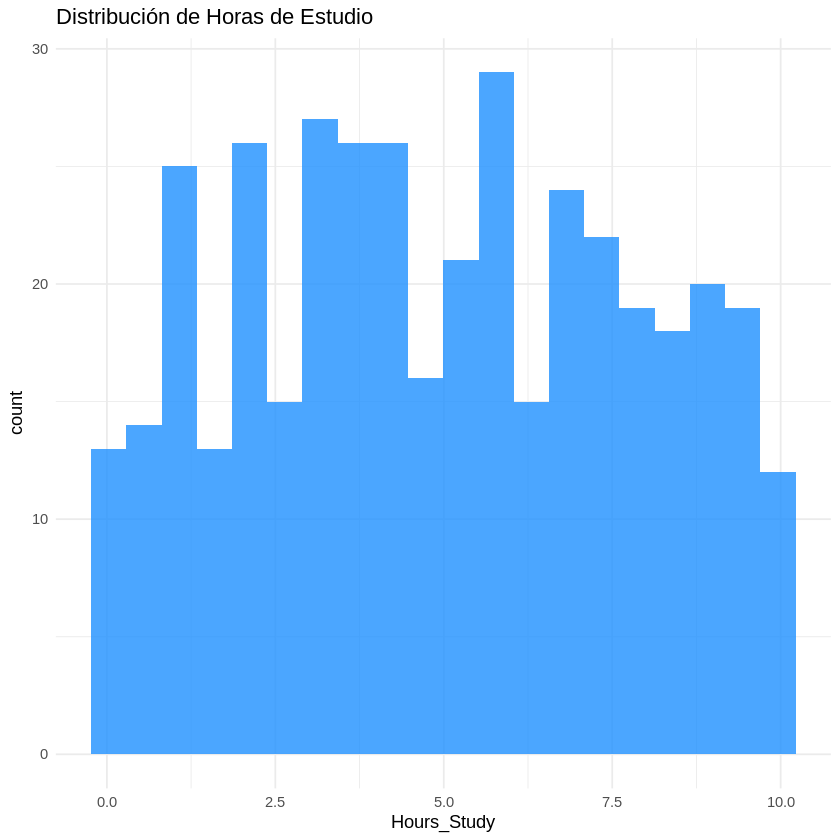

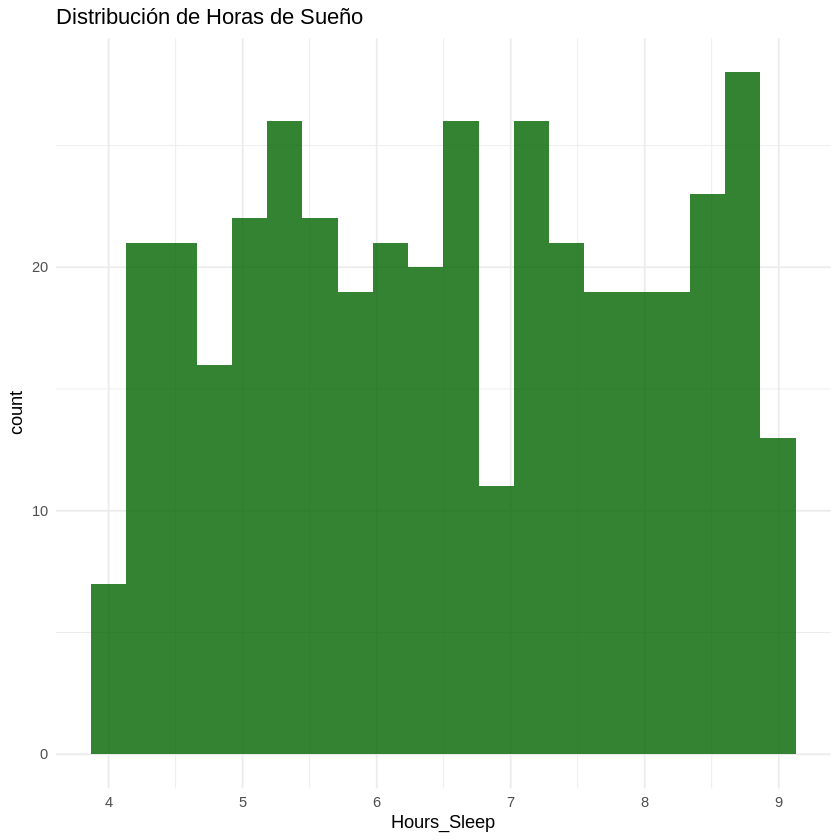

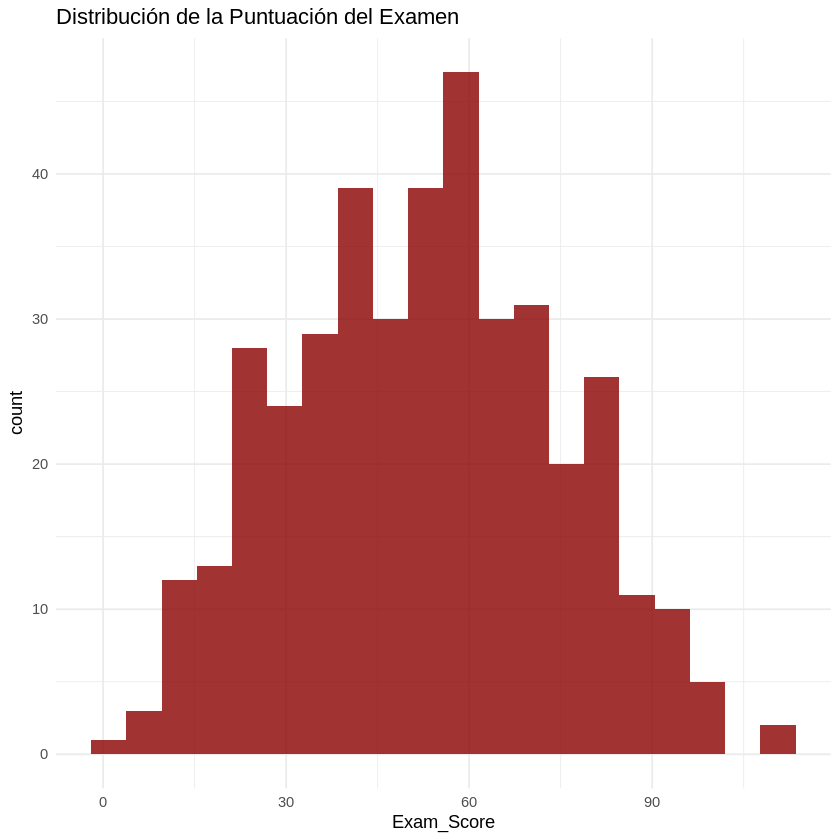

In [4]:
# Histograma de Horas de Estudio
ggplot(data, aes(x = Hours_Study)) +
  geom_histogram(bins = 20, fill = "dodgerblue", alpha = 0.8) +
  ggtitle("Distribución de Horas de Estudio") +
  theme_minimal()

# Histograma de Horas de Sueño
ggplot(data, aes(x = Hours_Sleep)) +
  geom_histogram(bins = 20, fill = "darkgreen", alpha = 0.8) +
  ggtitle("Distribución de Horas de Sueño") +
  theme_minimal()

# Histograma de la Puntuación del Examen
ggplot(data, aes(x = Exam_Score)) +
  geom_histogram(bins = 20, fill = "darkred", alpha = 0.8) +
  ggtitle("Distribución de la Puntuación del Examen") +
  theme_minimal()

## 3.2. Correlación y Relación entre variables

Usamos un gráfico de pares ya que consideramos que cae perfecto para este objetivo:

En la diagonal: la distribución de cada variable.

Debajo de la diagonal: gráficos de dispersión con una línea de tendencia.

Encima de la diagonal: el coeficiente de correlación.

**Análisis de correlación:** correlación positiva fuerte entre ```Hours_Study``` y ```Exam_Score```.

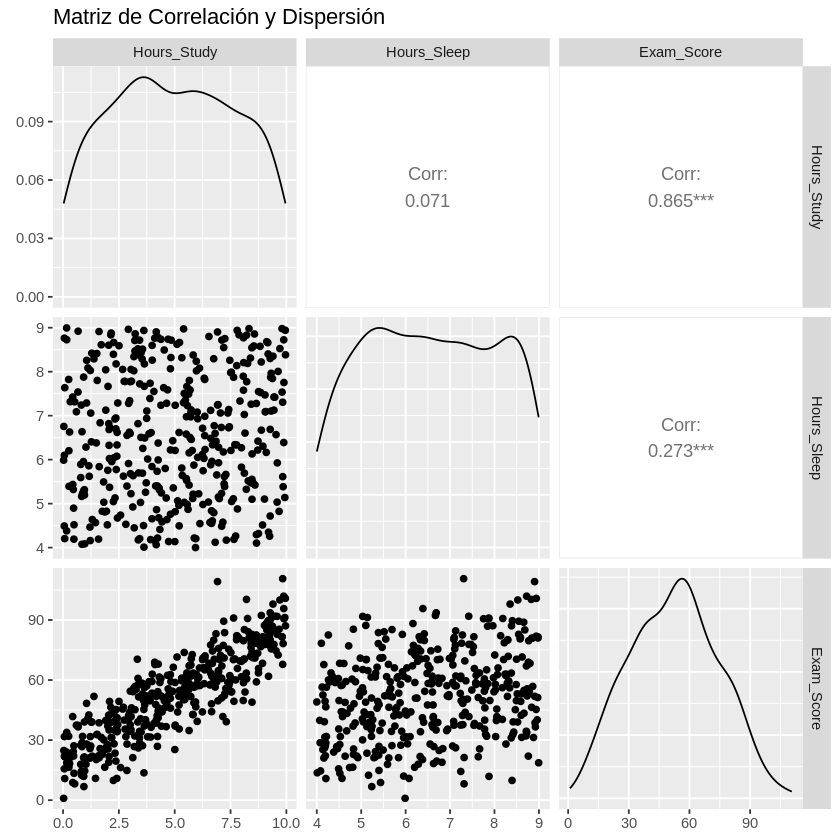

In [5]:
# Matriz de gráficos de pares
ggpairs(data) +
  ggtitle("Matriz de Correlación y Dispersión")

# 4. Preparación de Datos y Creación del Modelo

## 4.2. Preparación de datos de entrenamiento

Para la creación del modelo organizamos los datos en un conjunto de entrenamiento y un conjunto de prueba. Usaremos un 80% para entrenar y un 20% para probar.

In [6]:
# Colocamos la semila 42 (Random_State)
set.seed(42)

# Dividir los datos
split <- sample.split(data$Exam_Score, SplitRatio = 0.8)

# Creamos el conjunto de entrenamiento
train_data <- subset(data, split == TRUE)

# Creamos el conjunto de prueba
test_data <- subset(data, split == FALSE)

# Verificamos el tamaño de cada conjunto
cat("Tamaño de datos de entrenamiento:", nrow(train_data), "\n")
cat("Tamaño de datos de prueba:", nrow(test_data), "\n")

Tamaño de datos de entrenamiento: 320 
Tamaño de datos de prueba: 80 


## 4.2. Creación del modelo

Creamos el modelo de regresión lineal múltiple (```lm```) usando los datos de entrenamiento. La fórmula ```Exam_Score ~ Hours_Study + Hours_Sleep``` significa "predecir ```Exam_Score``` basándose en ```Hours_Study``` y ```Hours_Sleep```".

In [7]:
# Modelo de regresión lineal
model <- lm(Exam_Score ~ Hours_Study + Hours_Sleep, data = train_data)

# 5. Validación de modelo

## 5.1. Validación de estadístico F y P-Value y el $R^2$ ajustado

In [9]:
summary(model)


Call:
lm(formula = Exam_Score ~ Hours_Study + Hours_Sleep, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.915  -6.514  -0.398   7.132  35.767 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.8719     2.6509  -0.329    0.742    
Hours_Study   6.5591     0.1927  34.044  < 2e-16 ***
Hours_Sleep   3.2463     0.3756   8.642 2.77e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.738 on 317 degrees of freedom
Multiple R-squared:  0.8002,	Adjusted R-squared:  0.7989 
F-statistic: 634.7 on 2 and 317 DF,  p-value: < 2.2e-16


El P-Value debe de ser menor que $0.05$ para rechazar la hipótesis nula, el resultado que nos arrojo el modelo fue de $2.2 \times 10^{-16}$
, por lo tanto concluimos que nuestro modelo es válido.

El valor del $R^2$ ajustado ($0.7980$) indica que aproximadamente el 79.8 % de la variabilidad en la calificación de los estudiantes puede ser explicada por las variables horas de estudio y horas de sueño incluidas en el modelo de regresión lineal múltiple.

## 5.2. Tabla de Coeficientes


In [10]:
model$coefficients

(Intercept) Hours_Study Hours_Sleep 
 -0.8718937   6.5590923   3.2463079

## 5.3. Ecuación predictiva
Para hallar la calificación estimada de un estudiante según las variables explicativas: ```Hours_Study```  y  ```Hours_Sleep``` utilizamos la siguiente ecuación basada en los coeficientes del modelo:

$$\text{Calificación} = -0.87189 + 6.55909(\text{horas de estudio}) + 3.24630(\text{horas de sueño})$$

**EJEMPLO:**
Un estudiante que estudia 5 horas y duerma 6 horas.

In [21]:
calificacion <- -0.87189 + (6.55909 * 5) + (3.24630 * 6)
calificacion

[1] 51.40136

## 5.4. Gráfico de relación observada vs predecida

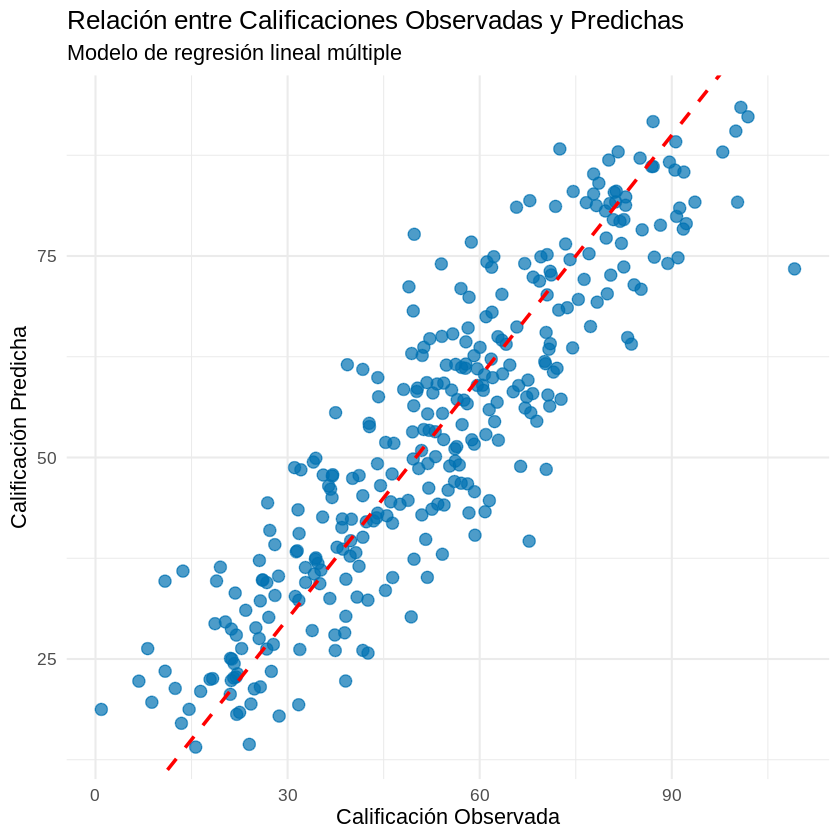

In [30]:
# Obtener las predicciones del modelo
train_data$Predicted <- predict(model, newdata = train_data)

# Graficar valores reales vs predichos
ggplot(train_data, aes(x = Exam_Score, y = Predicted)) +
  geom_point(color = "#0072B2", size = 3, alpha = 0.7) +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed", linewidth = 1) +
  labs(
    title = "Relación entre Calificaciones Observadas y Predichas",
    subtitle = "Modelo de regresión lineal múltiple",
    x = "Calificación Observada",
    y = "Calificación Predicha"
  ) +
  theme_minimal(base_size = 13)
